In [11]:
import numpy as np
import matplotlib.pyplot as plt

## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [19]:
#primo punto
def teste(n):
    lanci = np.array(np.random.randint(0, 2, n))
    freq = np.sum(lanci)/n
    return freq*100

In [24]:
#secondo punto
numeri = np.arange(10, 20000, 100)
percentuali = [teste(i) for i in numeri]
print(percentuali)


[np.float64(60.0), np.float64(46.36363636363636), np.float64(53.333333333333336), np.float64(54.19354838709678), np.float64(46.58536585365854), np.float64(50.3921568627451), np.float64(50.49180327868853), np.float64(52.25352112676056), np.float64(49.75308641975308), np.float64(48.35164835164835), np.float64(49.603960396039604), np.float64(48.55855855855856), np.float64(49.586776859504134), np.float64(51.526717557251914), np.float64(50.141843971631204), np.float64(50.13245033112583), np.float64(50.745341614906835), np.float64(51.16959064327485), np.float64(50.0), np.float64(51.78010471204188), np.float64(47.76119402985074), np.float64(50.66350710900473), np.float64(48.05429864253394), np.float64(49.696969696969695), np.float64(50.58091286307054), np.float64(51.67330677290837), np.float64(49.195402298850574), np.float64(50.0), np.float64(48.96797153024911), np.float64(50.51546391752577), np.float64(50.43189368770764), np.float64(50.70739549839228), np.float64(49.87538940809969), np.float

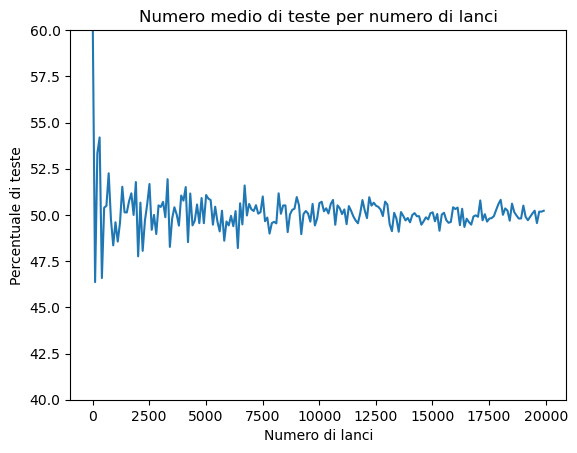

In [25]:
#terzo punto
plt.plot(numeri, percentuali)
plt.ylim((40, 60))
plt.title("Numero medio di teste per numero di lanci")
plt.xlabel("Numero di lanci")
plt.ylabel("Percentuale di teste")
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [26]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#primo punto
df.shape

(891, 12)

In [30]:
#secondo punto
for i in df.columns:
    na = df.shape[0] - df[df[i].notna()].shape[0]
    print(f"Colonna: {i}, NA: {na}")

#come l ha fatto lui
df.isnull().sum(axis=0)

Colonna: PassengerId, NA: 0
Colonna: Survived, NA: 0
Colonna: Pclass, NA: 0
Colonna: Name, NA: 0
Colonna: Sex, NA: 0
Colonna: Age, NA: 177
Colonna: SibSp, NA: 0
Colonna: Parch, NA: 0
Colonna: Ticket, NA: 0
Colonna: Fare, NA: 0
Colonna: Cabin, NA: 687
Colonna: Embarked, NA: 2


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#terzo punto
df["Embarked"].mode()
#ora so che il valore con piu evenienze è S
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.Embarked.value_counts()




Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
#quarto punto
mancanti = df[df.Age.isna() == True].index
df.drop(mancanti, axis=0, inplace=True)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [101]:
#quinto punto
unico = df.drop_duplicates()
if(unico.shape == df.shape):
    print("Non ci sono righe duplicate")
else:
    print("Ci sono righe duplicate")
print(unico.shape)
print(df.shape)

Non ci sono righe duplicate
(714, 12)
(714, 12)


In [33]:
#sesto punto
medie_classi = df.groupby("Pclass")["Age"].mean()

df["Age"] = df["Age"].fillna(medie_classi.mean())

<BarContainer object of 3 artists>

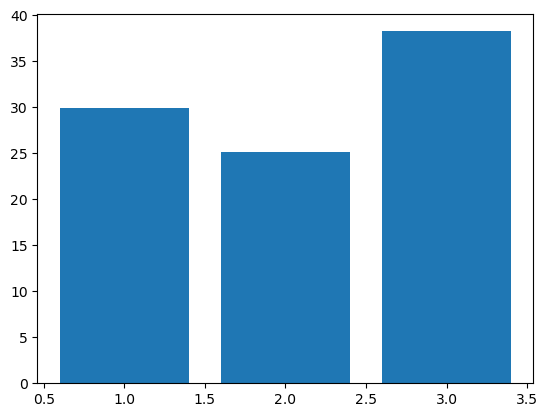

In [34]:
#settimo punto
plt.bar(df["Pclass"].unique(), medie_classi)

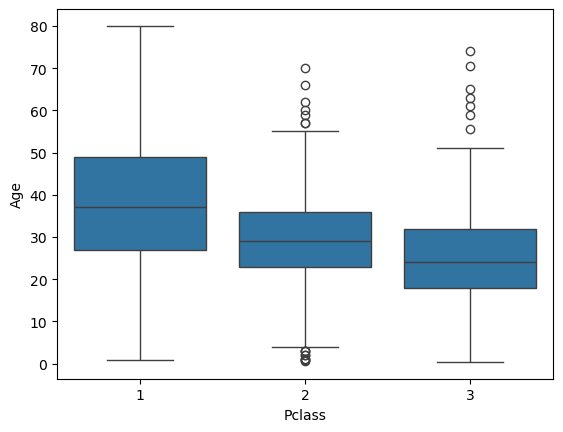

In [36]:
#sarebbe da fare cosi per vedere la distribuzione
sns.boxplot(data=df, x="Pclass", y="Age")
plt.show()

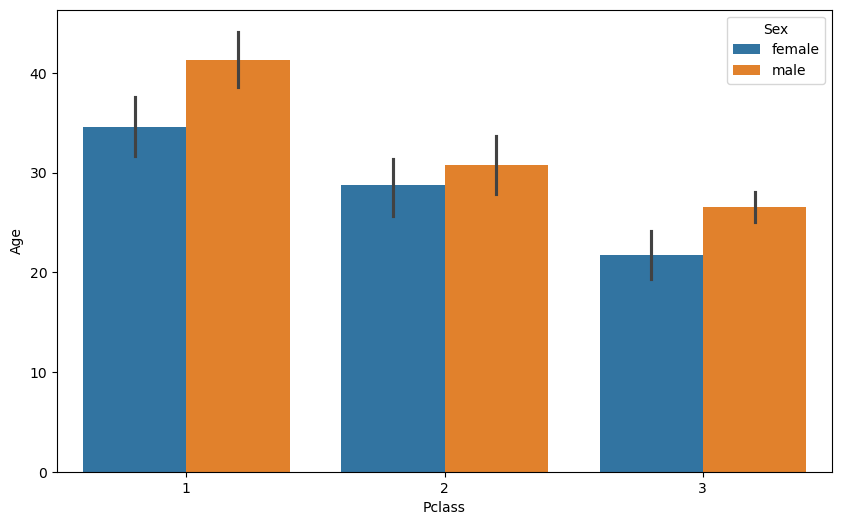

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Pclass", y="Age", hue="Sex")
plt.show()

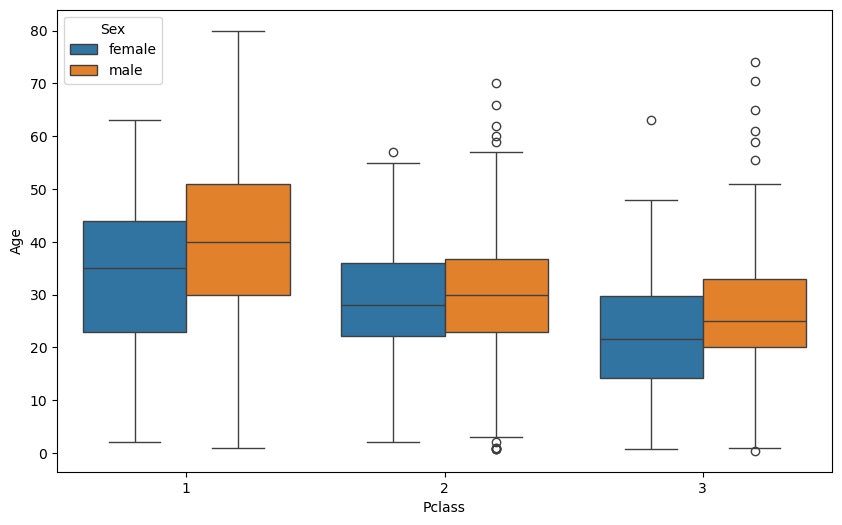

In [ ]:
#ottavo punto

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex")
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [45]:
lungh_media = df.groupby("species")["sepal_length"].mean()
largh_media = df.groupby("species")["sepal_width"].mean()

print(f"Lunghezza media: \n{lungh_media}\nLarghezza media: \n{largh_media}")

Lunghezza media: 
species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64
Larghezza media: 
species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64


<Axes: xlabel='petal_length', ylabel='petal_width'>

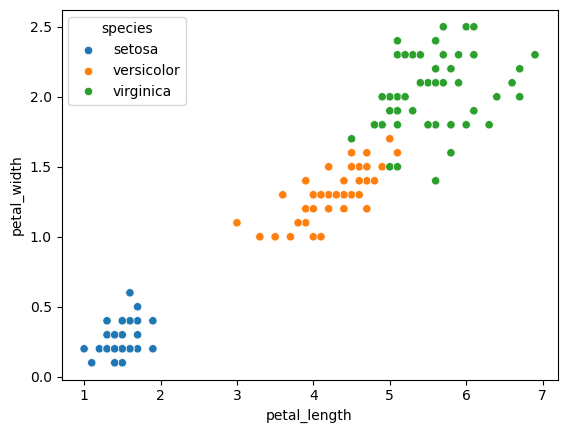

In [46]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

In [47]:
df["petal_surface"] = df["petal_length"] * df["petal_width"]
print(df.petal_surface)

0       0.28
1       0.28
2       0.26
3       0.30
4       0.28
       ...  
145    11.96
146     9.50
147    10.40
148    12.42
149     9.18
Name: petal_surface, Length: 150, dtype: float64


In [42]:
sns.boxplot(data=df, x="species", y="petal_surface")

ValueError: Could not interpret value `species` for `x`. An entry with this name does not appear in `data`.